In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
domestic16 = pd.read_csv('domestic_visitors_2016.csv')
domestic17 = pd.read_csv('domestic_visitors_2017.csv')
domestic18 = pd.read_csv('domestic_visitors_2018.csv')
domestic19 = pd.read_csv('domestic_visitors_2019.csv')

## Let's check the data quality

In [3]:
domestic16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  372 non-null    object
 1   date      372 non-null    object
 2   month     372 non-null    object
 3   year      372 non-null    int64 
 4   visitors  372 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.7+ KB


### If we can look at the data randomly we'll see some missing values in visitors columns but the previous cell says there's no missing values, that means those are empty strings

In [4]:
domestic16.sample(20)

,district,date,month,year,visitors
53,Jangaon,01-06-2016,June,2016,
348,Warangal (Urban),01-01-2016,January,2016,1985815
290,Siddipet,01-03-2016,March,2016,
320,Vikarabad,01-09-2016,September,2016,
88,Kamareddy,01-05-2016,May,2016,
284,Sangareddy,01-09-2016,September,2016,
95,Kamareddy,01-12-2016,December,2016,42
25,Hyderabad,01-02-2016,February,2016,778748
299,Siddipet,01-12-2016,December,2016,80500
360,Yadadri Bhongir,01-01-2016,January,2016,


### Let's look at the next year domestic data
### So as we can see it's the same issue

In [5]:
domestic17.sample(10)

,district,date,month,year,visitors
56,Jangaon,01-09-2017,September,2017,15600
151,Mahbubnagar,01-08-2017,August,2017,215229
181,Medchal,01-02-2017,February,2017,
205,Nalgonda,01-02-2017,February,2017,8652
71,Jayashankar Bhoopalpally,01-12-2017,December,2017,723000
245,Peddapalli,01-06-2017,June,2017,885
208,Nalgonda,01-05-2017,May,2017,10750
253,Rajanna Sircilla,01-02-2017,February,2017,1255569
331,Wanaparthy,01-08-2017,August,2017,21375
232,Nizamabad,01-05-2017,May,2017,1341


### We'll just merg all the domestic data together

In [6]:
pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


## Save in a single dataframe

In [7]:
domestic = pd.concat([domestic16,domestic17,domestic18,domestic19],ignore_index=True)

## Now we'll do the same thing for the foreign visitors dataframes

In [8]:
foreign16 = pd.read_csv('foreign_visitors_2016.csv')
foreign17 = pd.read_csv('foreign_visitors_2017.csv')
foreign18 = pd.read_csv('foreign_visitors_2018.csv')
foreign19 = pd.read_csv('foreign_visitors_2019.csv')

## As we can see there's some missing values prresent here as well

In [9]:
foreign16.sample(20)

,district,date,month,year,visitors
175,Medak,01-08-2016,August,2016,0
319,Vikarabad,01-08-2016,August,2016,
52,Jangaon,01-05-2016,May,2016,
182,Medchal,01-03-2016,March,2016,
77,Jogulamba Gadwal,01-06-2016,June,2016,
194,Nagarkurnool,01-03-2016,March,2016,
116,Khammam,01-09-2016,September,2016,0
176,Medak,01-09-2016,September,2016,0
104,Karimnagar,01-09-2016,September,2016,0
361,Yadadri Bhongir,01-02-2016,February,2016,


## Let's join them together

In [10]:
foreign = pd.concat([foreign16,foreign17,foreign18,foreign19],ignore_index=True)

## To check the data types of each column

In [11]:
domestic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1512 non-null   object
 1   date      1512 non-null   object
 2   month     1512 non-null   object
 3   year      1512 non-null   int64 
 4   visitors  1482 non-null   object
dtypes: int64(1), object(4)
memory usage: 59.2+ KB


## Data cleaning: Get rid of the missing values and empty strings

In [12]:
domestic.query("visitors.notna() and visitors != ' '")

,district,date,month,year,visitors
0,Adilabad,01-01-2016,January,2016,792136
1,Adilabad,01-02-2016,February,2016,937820
2,Adilabad,01-03-2016,March,2016,582946
3,Adilabad,01-04-2016,April,2016,341948
4,Adilabad,01-05-2016,May,2016,252887
...,...,...,...,...,...
1507,Yadadri Bhongir,01-08-2019,August,2019,389010
1508,Yadadri Bhongir,01-09-2019,September,2019,366862
1509,Yadadri Bhongir,01-10-2019,October,2019,381860
1510,Yadadri Bhongir,01-11-2019,November,2019,365990


In [13]:
domestic_clean = domestic.query("visitors.notna() and visitors != ' '").copy()

In [14]:
foreign_clean = foreign.query("visitors.notna() and visitors != ' '").copy()

## To check if still there's any missing values

In [15]:
domestic_clean.query("visitors.isna() == True")

,district,date,month,year,visitors


In [16]:
foreign_clean.query("visitors.isna() == True")

,district,date,month,year,visitors


## To change the visitor number as integers

In [17]:
domestic_clean['visitors'] = domestic_clean['visitors'].astype(int)

In [18]:
foreign_clean['visitors'] = foreign_clean['visitors'].astype(int)

In [19]:
domestic_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1167 non-null   object
 1   date      1167 non-null   object
 2   month     1167 non-null   object
 3   year      1167 non-null   int64 
 4   visitors  1167 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 50.1+ KB


In [20]:
foreign_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1192 entries, 0 to 1511
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   district  1192 non-null   object
 1   date      1192 non-null   object
 2   month     1192 non-null   object
 3   year      1192 non-null   int64 
 4   visitors  1192 non-null   int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 51.2+ KB


## To get the top districts visitor wise

In [21]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Sangareddy                  10424510
Karimnagar                   9462383
Khammam                      9378315
Nagarkurnool                 7424355
Adilabad                     7321575
Jogulamba Gadwal             6813340
Nalgonda                     6401933
Siddipet                     5775285
Mulugu                       1819800
Wanaparthy                    890078
Mancherial                    867242
Jangaon                       826280
Warangal (Rural)              819162
Mahabubabad                   600697
Narayanapet                   389250
Nizamabad                     116147
Komaram Bheem Asifabad       

In [22]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)

district
Hyderabad                   83900960
Rajanna Sircilla            41763276
Warangal (Urban)            30726603
Yadadri Bhongir             26893080
Bhadradri Kothagudem        21600962
Medak                       20542639
Jayashankar Bhoopalpally    19632865
Mahbubnagar                 17180118
Nirmal                      13315796
Jagtial                     11303514
Name: visitors, dtype: int32

## Let's plot the districts

<Axes: xlabel='district'>

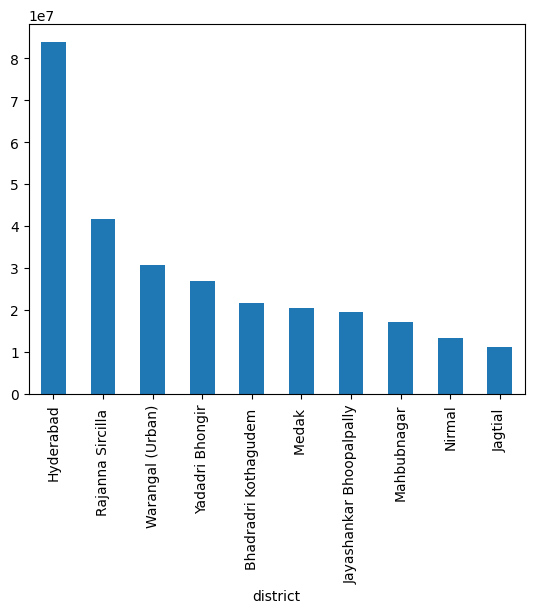

In [23]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='bar')

## If we wanna plot them horizontally

<Axes: ylabel='district'>

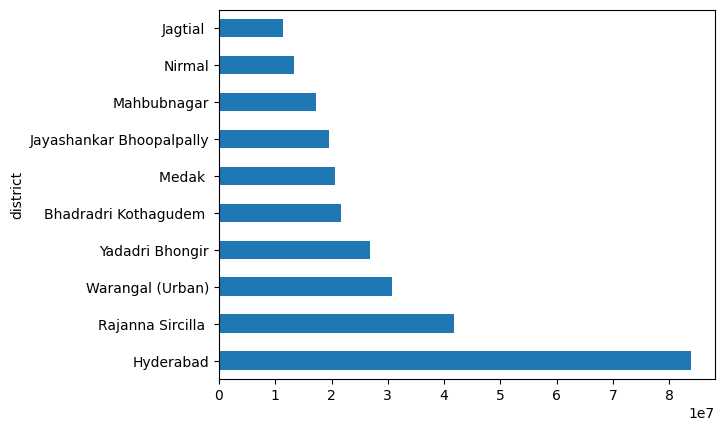

In [24]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10).plot(kind='barh')

## To get the highest value on the top

<Axes: ylabel='district'>

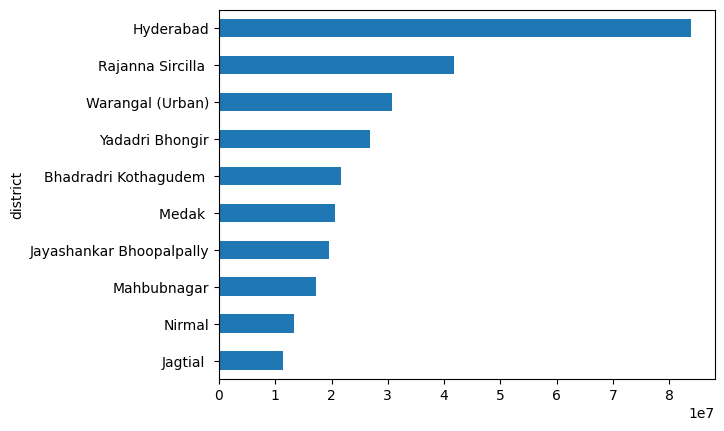

In [25]:
domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)[::-1].plot(kind='barh')

In [26]:
top_10_domestic_districts = domestic_clean.groupby('district')['visitors'].sum().sort_values(ascending=False).head(10)[::-1]

## To adjust the colors and make it visually apealing

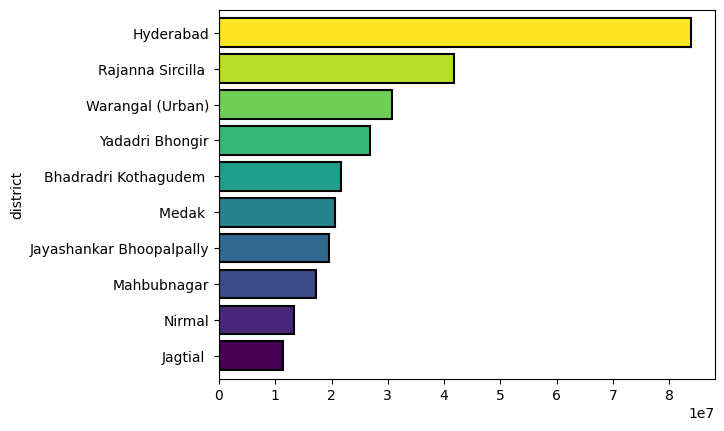

In [27]:
top_10_domestic_districts.plot(
    kind='barh',
    color=plt.cm.viridis(np.linspace(0, 1, len(top_10_domestic_districts))),
    edgecolor='black',
    linewidth=1.5,
    width=0.8
)
plt.show()

## Question 2: List down the top three districts based on compounded annual growth rate(CAGR) of visitors
![alt text](CARG_formula-1.JPG)

### To calculate the CAGR we need the begining value(total visitors in 2016 in each district) and final value(total visitors in 2019 in each district)

### To achieve the we need to melt the dataset using a pivot table

In [28]:
domestic_pivot = domestic_clean.pivot_table(values='visitors',index='district',columns='year',aggfunc='sum')

In [29]:
domestic_pivot

year,2016,2017,2018,2019
district,,,,
Adilabad,5075557.0,825380.0,644743.0,775895.0
Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0
Jagtial,623077.0,3641401.0,3952921.0,3086115.0
Jangaon,40660.0,165708.0,291022.0,328890.0
Jayashankar Bhoopalpally,243400.0,1831010.0,16895925.0,662530.0
Jogulamba Gadwal,523401.0,2245399.0,2036545.0,2007995.0
Kamareddy,127.0,540.0,572.0,534.0
Karimnagar,9167468.0,123976.0,93448.0,77491.0


## Get rid of missing values

In [34]:
domestic_pivot.dropna()

year,district,2016,2017,2018,2019
0,Adilabad,5075557.0,825380.0,644743.0,775895.0
1,Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
2,Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0
3,Jagtial,623077.0,3641401.0,3952921.0,3086115.0
4,Jangaon,40660.0,165708.0,291022.0,328890.0
5,Jayashankar Bhoopalpally,243400.0,1831010.0,16895925.0,662530.0
6,Jogulamba Gadwal,523401.0,2245399.0,2036545.0,2007995.0
7,Kamareddy,127.0,540.0,572.0,534.0
8,Karimnagar,9167468.0,123976.0,93448.0,77491.0
9,Khammam,5005031.0,1542403.0,1417441.0,1413440.0


In [35]:
domestic_pivot = domestic_pivot.reset_index().dropna().copy()

In [36]:
domestic_pivot.reset_index().dropna().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     27 non-null     int64  
 1   district  27 non-null     object 
 2   2016      27 non-null     float64
 3   2017      27 non-null     float64
 4   2018      27 non-null     float64
 5   2019      27 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ KB


In [44]:
domestic_pivot.head()

year,district,2016,2017,2018,2019
0,Adilabad,5075557.0,825380.0,644743.0,775895.0
1,Bhadradri Kothagudem,889030.0,4094317.0,3799878.0,12817737.0
2,Hyderabad,23394705.0,27160242.0,19543651.0,13802362.0
3,Jagtial,623077.0,3641401.0,3952921.0,3086115.0
4,Jangaon,40660.0,165708.0,291022.0,328890.0


In [58]:
for i in domestic_pivot.set_index('district').index:
    start_value = domestic_pivot.set_index('district').loc[i,2016]
    print(start_value)
    break

5075557.0


In [31]:
def calculate_cagr(df):
    # Pivot the DataFrame to get visitors per year for each district
    df_pivot = df.pivot_table(values='visitors', index='district', columns='year', aggfunc='sum')

    # Calculate CAGR for each district
    cagr = {}
    for district in df_pivot.index:
        start_value = df_pivot.loc[district, 2016]
        end_value = df_pivot.loc[district, 2019]
        if pd.notna(start_value) and pd.notna(end_value) and start_value > 0:
            cagr[district] = ((end_value / start_value) ** (1/3)) - 1

    # Convert CAGR to a DataFrame
    cagr_df = pd.DataFrame(list(cagr.items()), columns=['district', 'CAGR'])
    return cagr_df.sort_values(by='CAGR', ascending=False).head(3)

# Calculate the top 3 districts based on CAGR for domestic visitors
top_districts_domestic = calculate_cagr(domestic)

# Calculate the top 3 districts based on CAGR for foreign visitors
top_districts_foreign = calculate_cagr(foreign)

print("Top 3 districts based on CAGR for domestic visitors:")
print(top_districts_domestic)

print("Top 3 districts based on CAGR for foreign visitors:")
print(top_districts_foreign)


In [32]:
# def calculate_cagr(df):
#     # Pivot the DataFrame to get visitors per year for each district
#     df_pivot = df.pivot_table(values='visitors', index='district', columns='year', aggfunc='sum')

#     # Calculate CAGR for each district
#     cagr = {}
#     for district in df_pivot.index:
#         start_value = df_pivot.loc[district, 2016]
#         end_value = df_pivot.loc[district, 2019]
#         # Calculate CAGR without checking for NaN since it's already handled
#         cagr[district] = ((end_value / start_value) ** (1/3)) - 1

#     # Convert CAGR to a DataFrame
#     cagr_df = pd.DataFrame(list(cagr.items()), columns=['district', 'CAGR'])
#     return cagr_df.sort_values(by='CAGR', ascending=False).head(3)

# # Calculate the top 3 districts based on CAGR for domestic visitors
# top_districts_domestic = calculate_cagr(domestic_clean)

# # Calculate the top 3 districts based on CAGR for foreign visitors
# top_districts_foreign = calculate_cagr(foreign_clean)

# print("Top 3 districts based on CAGR for domestic visitors:")
# print(top_districts_domestic)

# print("Top 3 districts based on CAGR for foreign visitors:")
# print(top_districts_foreign)
